In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings("ignore")

## №1. Загрузите данные о выживаемости пассажиров Титаника из файла titanic_train.csv.

In [2]:
tb = pd.read_csv('titanic_train.csv')#датафрейм для основных преобразований
tb_train = pd.read_csv('titanic_train.csv')#датафрейм для исследования зависимостей и второстепенных преобразований

## №2. Представьте данные в виде таблицы. Посмотрите на первые 5 строк.

In [3]:
tb.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## №3. Избавьтесь от пустых значений, заменив их на медианные  значения (для количественных признаков) и на последнее встречающееся значение в столбце перед пропуском с помощью метода «ffill» в качестве аргумента функции fillna() (для категориальных)

#### Количество пропущенных значений в каждом столбце:

In [4]:
tb.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Замена пустых значений:

In [5]:
for namecol in tb.columns:
    if(tb[namecol].dtype == np.float64 or tb[namecol].dtype == np.int64):
        tb = tb.fillna(value = {namecol: tb[namecol].median()})
tb = tb.fillna(method = 'ffill')
tb = tb.fillna(value = {'Cabin':'C85'}, limit = 1)
tb

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C50,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## №4. Постройте график распределения целевой переменной Fare, а также графики влияния признаков на целевую переменную (попарные зависимости, корреляционные матрицы).

Text(0, 0.5, 'Количество человек')

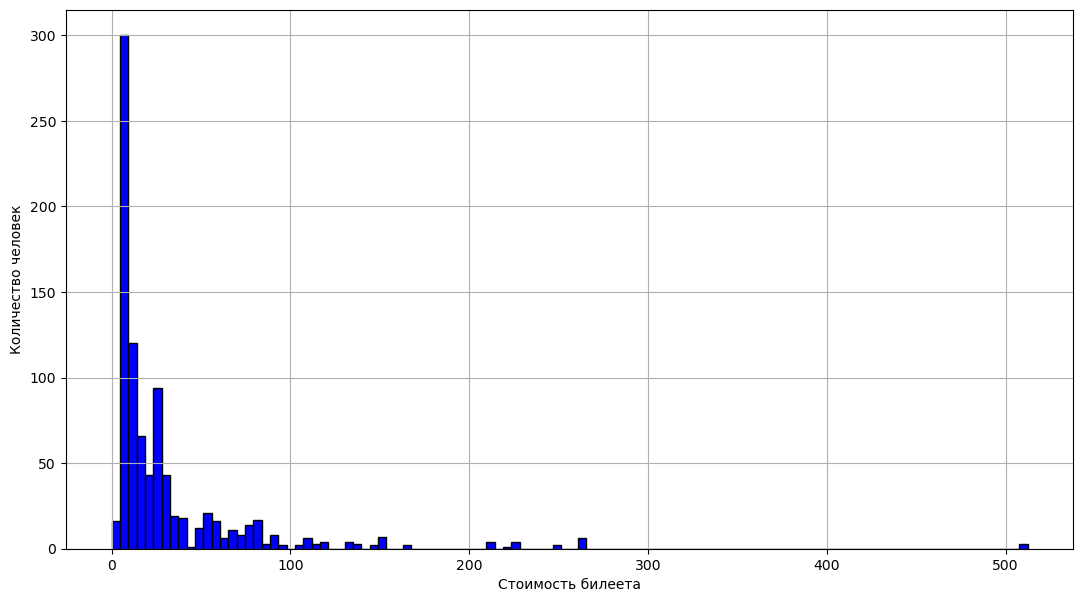

In [6]:
tb["Fare"].hist(bins = 110, figsize=(13,7), color = 'blue', edgecolor='black')
plt.xlabel('Стоимость билеета')
plt.ylabel('Количество человек')

### График попарных зависимостей

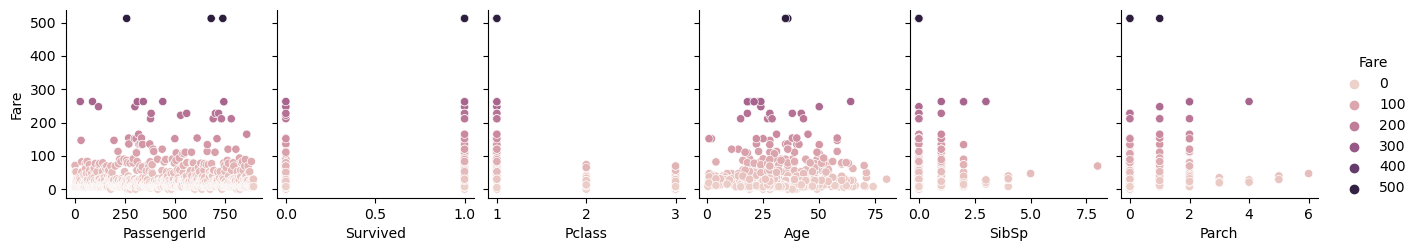

In [7]:
sns.pairplot(tb, y_vars= "Fare", x_vars = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch'], hue = 'Fare', height = 2.5, aspect = 0.9)
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
tb['Sex']=label.fit_transform(tb['Sex'])

### Корреляционная матрица:

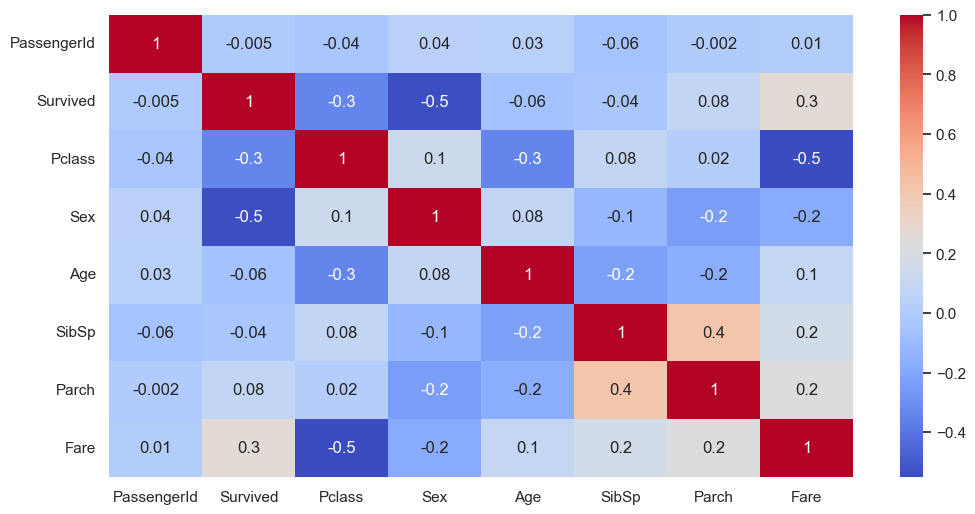

In [9]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(tb.corr(), annot = True, cmap= 'coolwarm', fmt='.1g', cbar_kws = {'orientation': 'vertical'})
plt.show()

## № 5. Произведите отбор признаков. Удалите неинформативные, либо оставьте все. Аргументируйте свой выбор.

#### В первую очередь удалим из датафрейма столбцы: "PassengerId", "Name", "Ticket". Так как эти данные носят чисто справочный характер и никак не помогут нам при обучении модели.

In [10]:
tb = tb.drop(['PassengerId','Name','Ticket'], axis=1)
tb.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,C85,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,C85,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,C123,S


#### Проверим как фактор отсутствия каюты соотносится со стоимостью билета:

In [11]:
tb['Cabin_indicator'] = np.where(tb_train['Cabin'].isnull(), 0, 1)#Добавим индикатор наличия каюты у пассажира в основной датафрейм
tb = tb.drop(['Cabin'], axis=1)#Удалим записи о номерах кают, так как теперь эти данные не несут нам пользы
tb.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_indicator
0,0,3,1,22.0,1,0,7.2500,S,0
1,1,1,0,38.0,1,0,71.2833,C,1
2,1,3,0,26.0,0,0,7.9250,S,0
3,1,1,0,35.0,1,0,53.1000,S,1
4,0,3,1,35.0,0,0,8.0500,S,0


#### Зависимость цены билета от класса пассажира:

Text(0, 0.5, 'Средняя цена билета')

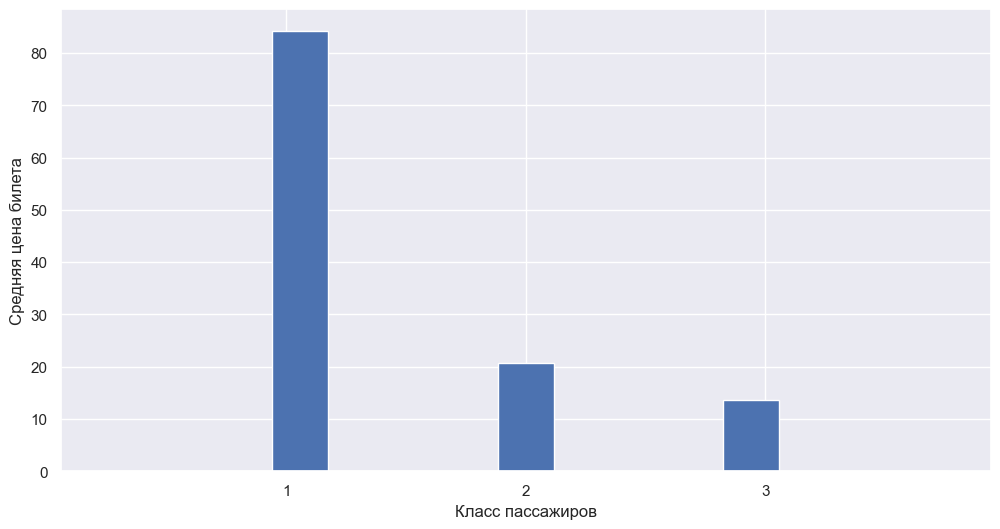

In [12]:
dict_fare = {str(clas): tb[(tb["Pclass"] == clas)]["Fare"].mean() for clas in range(0,5)}
tb2 = pd.DataFrame(list(dict_fare.items()), columns=['Class', 'Fare'])
tb3 = list(dict_fare.items())
plt.hist(tb2.Class, weights = tb2.Fare, bins = 17)
plt.xlabel('Класс пассажиров')
plt.ylabel('Средняя цена билета')

#### Чем выше класс, тем больше цена билета.

#### Проверим как пропуски в значниях каюты распределены в зависимости от класса:

<AxesSubplot:xlabel='Pclass', ylabel='count'>

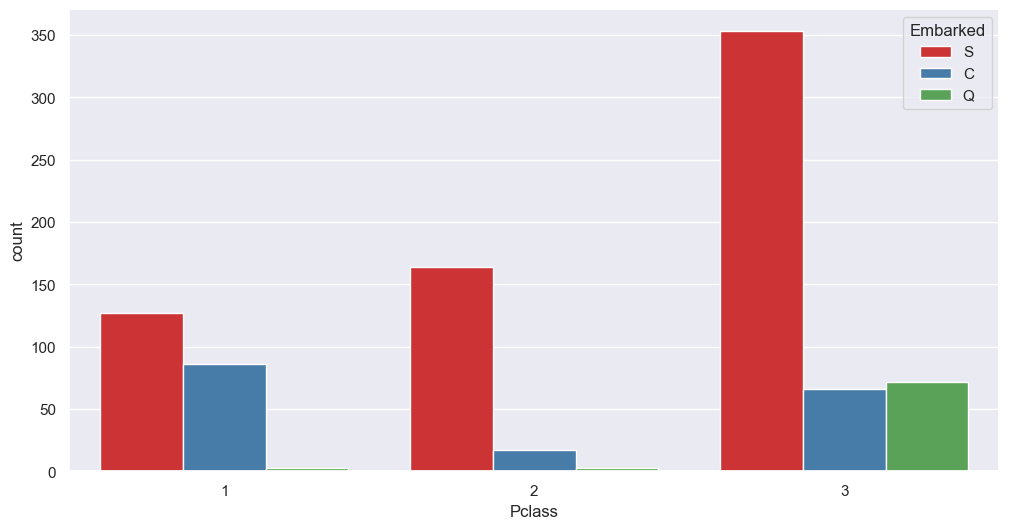

In [13]:
sns.countplot(tb, x = "Pclass", hue = tb['Embarked'], palette = "Set1")#График, отображающий пропуски в значниях каюты в зависимости от класса.

#### Видно, что чем выше класс тем меньше пропусков в графе каюта, следовательно тем выше цена билета, то есть данный признак можно включить в наш датафрейм.

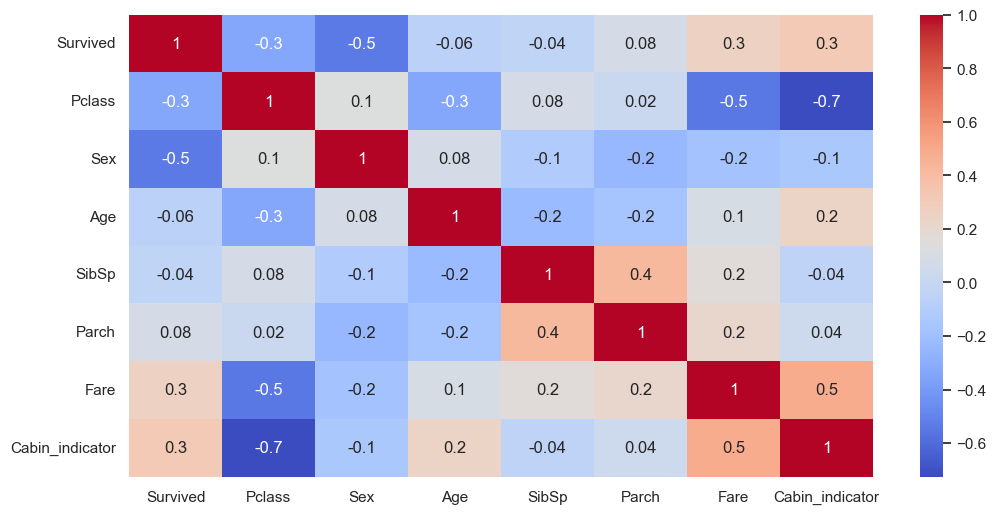

In [14]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(tb.corr(), annot = True, cmap= 'coolwarm', fmt='.1g', cbar_kws = {'orientation': 'vertical'})
plt.show()

#### Сравнение средней цены билета у мужчин и у женщин:

In [15]:
tb.groupby('Sex')['Fare'].mean()

Sex
0    44.479818
1    25.523893
Name: Fare, dtype: float64

#### Средняя цена билета в зависимости от порта посадки:

In [16]:
tb.groupby('Embarked')['Fare'].mean()

Embarked
C    60.072759
Q    14.131465
S    27.079812
Name: Fare, dtype: float64

#### Закодируем порты посадки в порядке возрастания средней цены за билет, чтобы получить новый признак для целевой переменной:

In [17]:
tb.loc[(tb.Embarked == 'Q'), 'Embarked'] = 0
tb.loc[(tb.Embarked == 'S'), 'Embarked'] = 1
tb.loc[(tb.Embarked == 'C'), 'Embarked'] = 2

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
tb['Embarked']=label.fit_transform(tb['Embarked'])
tb.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_indicator
0,0,3,1,22.0,1,0,7.2500,1,0
1,1,1,0,38.0,1,0,71.2833,2,1
2,1,3,0,26.0,0,0,7.9250,1,0
3,1,1,0,35.0,1,0,53.1000,1,1
4,0,3,1,35.0,0,0,8.0500,1,0


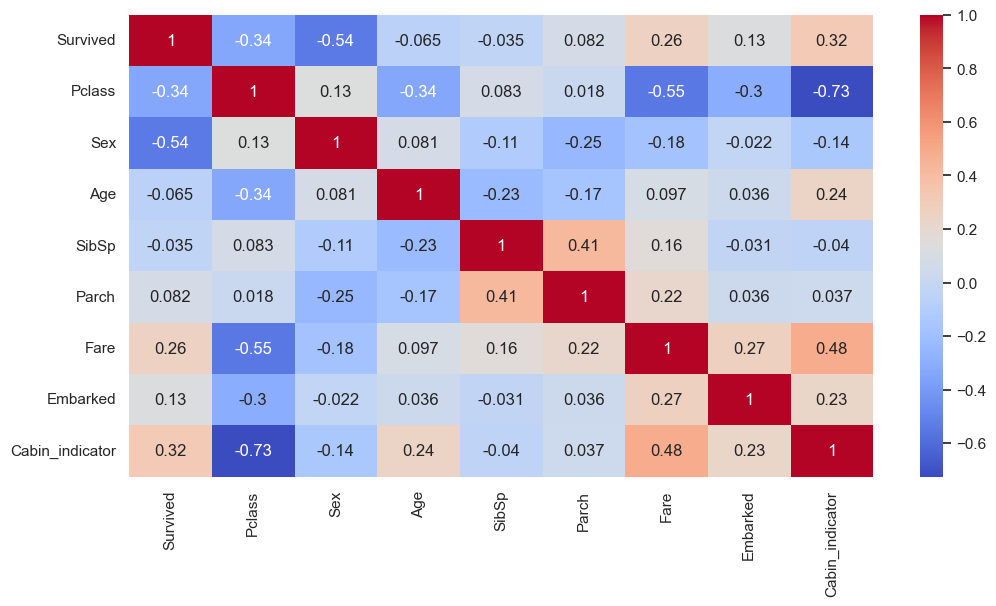

In [18]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(tb.corr(), annot = True, cmap= 'coolwarm', fmt='.2g', cbar_kws = {'orientation': 'vertical'})
plt.show()

#### Оставим признаки, коэффициент корреляции которых с целевой переменной больше 0.2:

In [19]:
tb = tb.drop(['Sex','Age','SibSp'], axis=1)
tb.head()

,Survived,Pclass,Parch,Fare,Embarked,Cabin_indicator
0,0,3,0,7.2500,1,0
1,1,1,0,71.2833,2,1
2,1,3,0,7.9250,1,0
3,1,1,0,53.1000,1,1
4,0,3,0,8.0500,1,0


#### Признак Cabin_indicator всё-таки не нужно включать в итоговый датафрейм, чтобы избежать мультиколлинеарности.

In [20]:
tb = tb.drop(['Cabin_indicator'], axis=1)
tb.head()

,Survived,Pclass,Parch,Fare,Embarked
0,0,3,0,7.2500,1
1,1,1,0,71.2833,2
2,1,3,0,7.9250,1
3,1,1,0,53.1000,1
4,0,3,0,8.0500,1


## №6. Закодируйте данные (столбцы object) с помощью выбранного вами метода (словарь, кодировщик LabelEncoder(), One-Hot-Encoding)

In [21]:
print(tb.dtypes)

Survived      int64
Pclass        int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object


#### Единственный в итоговом датафрейме столбец с данными типа object был закодирован значениями типа int в результате отбора признаков

## №7. Разбейте данные на обучающую и проверочную выборки. Объясните почему вы пользуетесь выбранным методом и в какой пропорции вы выполняете разбиение данных.

#### Масштабируем данные:

In [22]:
from sklearn.preprocessing import StandardScaler # загружаем класс для маштабирования
scal = StandardScaler()
tb_n = tb.drop("Fare", axis = 1)
names = tb_n.columns
tb_scal = scal.fit_transform(tb.drop("Fare", axis = 1))
tb_scal_w = pd.DataFrame(tb_scal, columns = names)
tb_scal_w

,Survived,Pclass,Parch,Embarked
0,-0.789272,0.827377,-0.473674,-0.197735
1,1.266990,-1.566107,-0.473674,1.738326
2,1.266990,0.827377,-0.473674,-0.197735
3,1.266990,-1.566107,-0.473674,-0.197735
4,-0.789272,0.827377,-0.473674,-0.197735
...,...,...,...,...
886,-0.789272,-0.369365,-0.473674,-0.197735
887,1.266990,-1.566107,-0.473674,-0.197735
888,-0.789272,0.827377,2.008933,-0.197735
889,1.266990,-1.566107,-0.473674,1.738326


In [23]:
x = tb_scal_w.copy()#копируем наш датафрейм в переменную х
y = tb['Fare']#создаем y - целевую переменную
from sklearn.model_selection import train_test_split #подгружаем функцию, которая разбивает данные случ. образом
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)#разбиение данных на обучающую и тестовую выборки

## №8. Обучите минимум 4 регрессионных модели из разных групп алгоритмов. Подберите метрики для оценки точности, аргументируйте свой выбор и проверьте качество работы каждой модели.
### Для удобства и большей информативности, результаты 8 и 9 пунктов совмещены
## №9. Выполните оценку точности и качества работы модели на обучающей и тестовой выборках с помощью выбранных(ой) метрик(и)

### (8/9).1. LinearRegression (Линейная регрессия)
#### (8/9).1.1. Загрузка модели

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(n_jobs = 1) # создаем объект класса LinearRegression

#### (8/9).1.2. Обучение модели

In [25]:
lin_reg.fit(x_train, y_train) # обучаем на обучающей выборке

LinearRegression(n_jobs=1)

In [26]:
y_pred_lr = lin_reg.predict(x_test) # предсазываем y на тестовой выборке

#### (8/9).1.3. Оценка точности работы модели

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
np.sqrt(mean_squared_error(y_test, y_pred_lr)) # берем квадратный корень из СКО

34.880077530334425

In [28]:
mean_absolute_error(y_pred_lr, y_test) # средняя абсолютная ошибка

21.159713485887064

In [29]:
r2_score(y_test, y_pred_lr) # коэффициент детерминации

0.43585947201406705

In [30]:
pd.DataFrame(lin_reg.coef_, x.columns, columns = ["coef"]).sort_values(by = "coef", ascending = False) # Распределения весов влияния на целевую переменную каждого признака

,coef
Parch,11.064037
Embarked,3.687892
Survived,2.940847
Pclass,-25.849059


### (8/9).2. SGDRegressor (Линейная регрессия с регуляризацией)
#### (8/9).2.1. Загрузка модели

In [31]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor() # создаем объект класса SGDRegressor

#### (8/9).2.2. Обучение модели

In [32]:
sgd_reg.fit(x_train, y_train) # обучаем на обучающей выборке

SGDRegressor()

In [33]:
y_pred_sgd_reg = sgd_reg.predict(x_test) # предсазываем y на тестовой выборке

#### (8/9).2.3. Оценка точности работы модели

In [34]:
np.sqrt(mean_squared_error(y_test, y_pred_sgd_reg)) # берем квадратный корень из СКО

34.89420555102913

In [35]:
mean_absolute_error(y_pred_sgd_reg, y_test) # средняя абсолютная ошибка

21.35861648795383

In [36]:
r2_score(y_test, y_pred_sgd_reg) # коэффициент детерминации

0.4354023742228116

In [37]:
pd.DataFrame(sgd_reg.coef_, x.columns, columns = ["coef"]).sort_values(by = "coef", ascending = False) # Распределения весов влияния на целевую переменную каждого признака

,coef
Parch,10.947245
Embarked,3.866399
Survived,3.139138
Pclass,-26.179504


### (8/9).3. RandomForestRegressor (Регрессия на основе метода случайного леса)
#### (8/9).3.1. Загрузка модели

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor() # создаем объект класса RandomForestRegressor

#### (8/9).3.2. Обучение модели

In [39]:
rf_reg.fit(x_train, y_train) # обучаем на обучающей выборке

RandomForestRegressor()

In [40]:
y_pred_rf_reg = rf_reg.predict(x_test) # предсазываем y на тестовой выборке

#### (8/9).3.3. Оценка точности работы модели

In [41]:
np.sqrt(mean_squared_error(y_test, y_pred_rf_reg)) # берем квадратный корень из СКО

32.31188593665662

In [42]:
mean_absolute_error(y_test, y_pred_rf_reg) # средняя абсолютная ошибка

16.575256763041192

In [43]:
r2_score(y_test, y_pred_rf_reg) # коэффициент детерминации

0.5158755332699383

In [44]:
pd.DataFrame(rf_reg.feature_importances_, x.columns, columns=["coef_rf"]).sort_values(by="coef_rf", ascending = False) # Таблица важности каждого признака

,coef_rf
Pclass,0.63833
Parch,0.22387
Embarked,0.07498
Survived,0.06282


### (8/9).4. GradientBoostingRegressor (градиентный бустинг над решающими деревьями)
#### (8/9).4.1. Загрузка модели

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor() # создаем объект класса GradientBoostingRegressor

#### (8/9).4.2. Обучение модели

In [46]:
gb_reg.fit(x_train, y_train) # обучаем на обучающей выборке

GradientBoostingRegressor()

In [47]:
y_pred_gb_reg = gb_reg.predict(x_test) # предсазываем y на тестовой выборке

#### (8/9).4.3. Оценка точности работы модели

In [48]:
np.sqrt(mean_squared_error(y_test, y_pred_gb_reg)) # берем квадратный корень из СКО

32.20034679716026

In [49]:
mean_absolute_error(y_pred_gb_reg, y_test) # средняя абсолютная ошибка

16.48011820699622

In [50]:
r2_score(y_test, y_pred_gb_reg) # коэффициент детерминации

0.5192121150965223

In [51]:
pd.DataFrame(gb_reg.feature_importances_, x.columns, columns=["coef_rf"]).sort_values(by="coef_rf", ascending = False) # Таблица важности каждого признака

,coef_rf
Pclass,0.671739
Parch,0.207279
Embarked,0.067780
Survived,0.053202


## №10. Выберите лучшую по точности модель для прогнозирования цены за билет.

### Лучшие значения используемых метрик показала модель:
#### (8/9).4. GradientBoostingRegressor (градиентный бустинг над решающими деревьями)

## №11. Выполните подбор параметров для данной модели с помощью «поиска по сетке» и кросс-валидации.
### Для удобства и большей информативности, результаты 11 и 12 пунктов совмещены
## №12. Выполните предсказание для целевой переменной тестовой выборки и еще раз оцените точность модели.

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
parameters = {'learning_rate': np.arange(0.001, 1),
              'subsample'    : np.arange(0.1,1.0),
              'n_estimators' : np.arange(100, 300),
              'max_depth'    : np.arange(1,12)
             }

In [55]:
grid_GBR = GridSearchCV(estimator = gb_reg, param_grid = parameters, cv = 7, n_jobs=-1)
grid_GBR.fit(x_train, y_train)
best_est = grid_GBR.best_estimator_
y_pred_grid = best_est.predict(x_test)

In [58]:
print("\n Лучшие параметры:\n", grid_GBR.best_params_)


 Лучшие параметры:
 {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 298, 'subsample': 0.1}


In [64]:
gb_reg_p = GradientBoostingRegressor(learning_rate = 0.001, max_depth = 5, n_estimators = 298, subsample = 0.1)
gb_reg_p.fit(x_train, y_train)
yp_gb_reg_p = gb_reg_p.predict(x_test)

In [69]:
np.sqrt(mean_squared_error(y_test, yp_gb_reg_p)) # берем квадратный корень из СКО

39.58739343249177

In [68]:
 mean_absolute_error(yp_gb_reg_p, y_test) # средняя абсолютная ошибка

23.352169906206388

In [67]:
r2_score(y_test, yp_gb_reg_p) # коэффициент детерминации

0.27331493924531347

## №13. Сохраните модель в отдельный файл .pkl.

In [71]:
import joblib
joblib.dump(gb_reg_p, "gb_reg_p.pkl") # сохранение модели

['gb_reg_p.pkl']

In [73]:
clf_load = joblib.load("gb_reg_p.pkl") # загрузка модели
clf_load

GradientBoostingRegressor(learning_rate=0.001, max_depth=5, n_estimators=298,
                          subsample=0.1)

## №14. Сохраните файл с предсказанием.

In [74]:
type(yp_gb_reg_p)

numpy.ndarray

In [75]:
y_pred_series = pd.Series(yp_gb_reg_p, name="Pred") # создаем объект типа Series для того, чтобы применить метод to_csv (сохранение вектора предсказания в csv)
y_pred_series.to_csv("predict.csv", header=True ) # сохраняем вектор предсказания в csv
pd.read_csv("predict.csv").drop("Unnamed: 0", axis = 1) # читаем файл с предсказанием

,Pred
0,27.875283
1,28.087432
2,26.138694
3,30.274111
4,26.807164
...,...
263,27.236223
264,33.794261
265,33.794261
266,26.138694
